## Tema 1

### 01_mpl_intro

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# define the models and draw some data
model= lambda x: x * np.sin(x)

xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fits
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

rf = RandomForestRegressor()
rf.fit(xdata[:, np.newaxis], ydata)

lr = LinearRegression()
lr.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit_1, MSE_1 = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit_1 = 2 * np.sqrt(MSE_1)  # 2*sigma ~ 95% confidence region

yfit_2 = rf.predict(xfit[:, np.newaxis])
MSE_2 = mean_squared_error(model(xfit), yfit_2, multioutput='raw_values')
dyfit_2 = 2 * np.sqrt(MSE_2)

yfit_3 = rf.predict(xfit[:, np.newaxis])
MSE_3 = mean_squared_error(model(xfit), yfit_3, multioutput='raw_values')
dyfit_3 = 2 * np.sqrt(MSE_3)



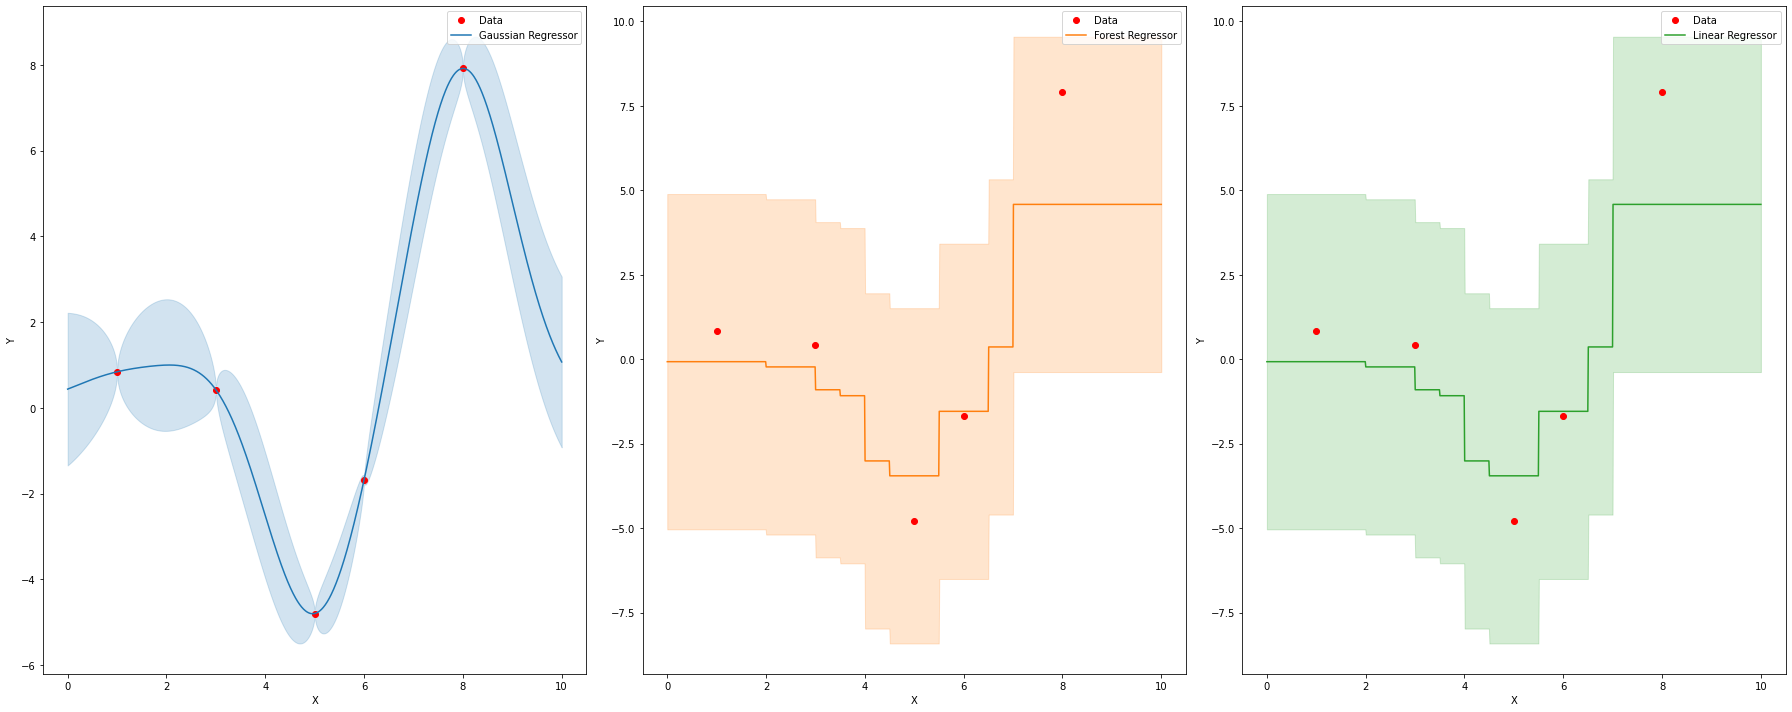

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

# Etiquetas y leyendas
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].plot(xdata, ydata, 'or', label='Data')
axs[0].plot(xfit, yfit_1, '-', color='#1f77b4', label='Gaussian Regressor')
axs[0].fill_between(xfit, yfit_1 - dyfit_1, yfit_1 + dyfit_1,
                     color='#1f77b4', alpha=0.2)
axs[0].legend()

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].plot(xdata, ydata, 'or', label='Data')
axs[1].plot(xfit, yfit_2, '-', color='#ff7f0e', label='Forest Regressor')
axs[1].fill_between(xfit, yfit_2 - dyfit_2, yfit_2 + dyfit_2,
                     color='#ff7f0e', alpha=0.2)
axs[1].legend()

axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].plot(xdata, ydata, 'or', label='Data')
axs[2].plot(xfit, yfit_3, '-', color='#2ca02c', label='Linear Regressor')
axs[2].fill_between(xfit, yfit_3 - dyfit_3, yfit_3 + dyfit_3,
                     color='#2ca02c', alpha=0.2)
axs[2].legend()

plt.tight_layout()
plt.show()


### 02_mpl_styles_config

c:\Users\danie\anaconda3\envs\Visualizacion\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


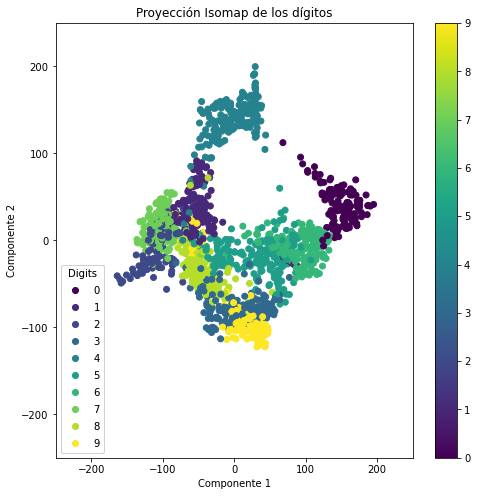

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

digits = load_digits()
X = digits.data
y = digits.target


iso = Isomap(n_components=2)
projection = iso.fit_transform(X)


fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(projection[:, 0], projection[:, 1], c=y, cmap='viridis')


legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Digits")
ax.add_artist(legend)


cbar = plt.colorbar(scatter)
cbar.set_ticks(range(10))
cbar.set_ticklabels(range(10))
ax.set_ylim(-250, 250)
ax.set_xlim(-250, 250)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Proyección Isomap de los dígitos')


plt.show()


### 03_mpl_hist_dens_text

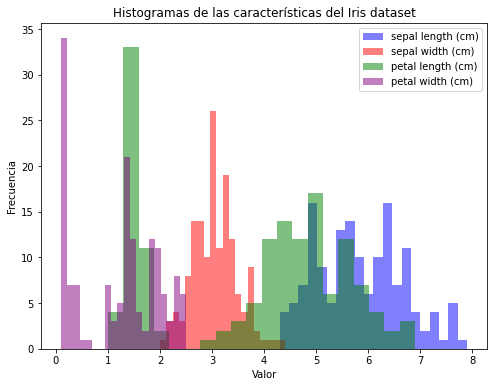

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T

colors = ['blue', 'red', 'green', 'purple']
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(features.shape[0]):
    ax.hist(features[i], bins=20, color=colors[i], alpha=0.5)

ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.set_title('Histogramas de las características del Iris dataset')

ax.legend(iris.feature_names)

plt.show()


### 05_mpl_geo

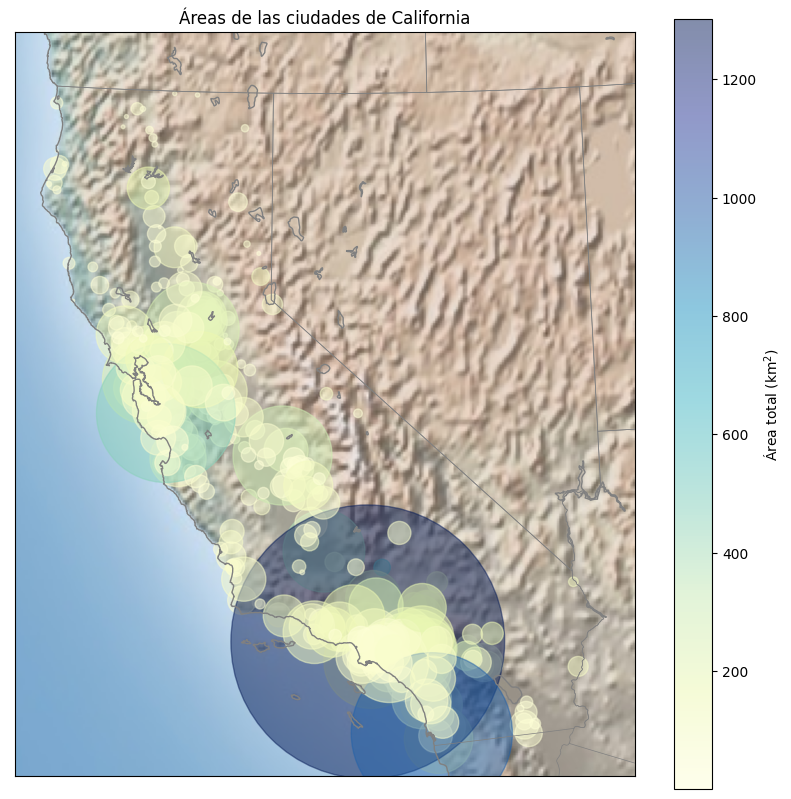

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

cities = pd.read_csv('data/california_cities.csv')

lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

fig = plt.figure(figsize=(10, 10))
plt.title('Áreas de las ciudades de California')
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

x, y = m(lon, lat)

plt.scatter(x, y, alpha=0.5, s=population/100, c=area, cmap='YlGnBu')
plt.colorbar(label='Área total (km$^2$)')

plt.show()

